# 🌳 Tree Census in New York City

## Data Cleaning Pipeline

**Datasets source: [Kaggle](https://www.kaggle.com/datasets/nycparks/tree-census/data)**

**Prepare the raw NYC Tree Census data for analysis by handling missing values, correcting data types, and standardizing fields.**

### 1. Import Python libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import re

### 2. Raw data

In [2]:
# Load raw datasets
raw_data = {
    1995: "new_york_tree_census_1995.csv",
    2005: "new_york_tree_census_2005.csv",
    2015: "new_york_tree_census_2015.csv",
}

# File paths for cleaned datasets
clean_data = {
    1995: "1995_trees.csv",
    2005: "2005_trees.csv",
    2015: "2015_trees.csv",
}

# Read raw datasets
df95_raw = pd.read_csv(raw_data[1995])
df05_raw = pd.read_csv(raw_data[2005])
df15_raw = pd.read_csv(raw_data[2015])

# Display raw dataset sizes
print("1995 raw dataset size:", df95_raw.shape)
print("2005 raw dataset size:", df05_raw.shape)
print("2015 raw dataset size:", df15_raw.shape)

# Combine all raw datasets for overall size
df_all = pd.concat([df95_raw, df05_raw, df15_raw], ignore_index=True, sort=False)
print("Total raw dataset size:", df_all.shape)

1995 raw dataset size: (516989, 27)
2005 raw dataset size: (1777116, 47)
2015 raw dataset size: (683788, 41)
Total raw dataset size: (2977893, 92)


Explore raw datasets

In [3]:
df95_raw.info()
dict(df95_raw.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516989 entries, 0 to 516988
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   recordid            516989 non-null  int64  
 1   address             516989 non-null  object 
 2   house_number        516989 non-null  object 
 3   street              516989 non-null  object 
 4   zip_original        516989 non-null  int64  
 5   cb_original         516989 non-null  int64  
 6   site                516989 non-null  object 
 7   species             516989 non-null  object 
 8   diameter            516989 non-null  int64  
 9   status              516989 non-null  object 
 10  wires               143242 non-null  object 
 11  sidewalk_condition  495716 non-null  object 
 12  support_structure   23634 non-null   object 
 13  borough             516989 non-null  object 
 14  x                   516989 non-null  float64
 15  y                   516989 non-nul

{'recordid': dtype('int64'),
 'address': dtype('O'),
 'house_number': dtype('O'),
 'street': dtype('O'),
 'zip_original': dtype('int64'),
 'cb_original': dtype('int64'),
 'site': dtype('O'),
 'species': dtype('O'),
 'diameter': dtype('int64'),
 'status': dtype('O'),
 'wires': dtype('O'),
 'sidewalk_condition': dtype('O'),
 'support_structure': dtype('O'),
 'borough': dtype('O'),
 'x': dtype('float64'),
 'y': dtype('float64'),
 'longitude': dtype('float64'),
 'latitude': dtype('float64'),
 'cb_new': dtype('int64'),
 'zip_new': dtype('int64'),
 'censustract_2010': dtype('O'),
 'censusblock_2010': dtype('O'),
 'nta_2010': dtype('O'),
 'segmentid': dtype('int64'),
 'spc_common': dtype('O'),
 'spc_latin': dtype('O'),
 'location': dtype('O')}

In [4]:
df05_raw.info()
dict(df05_raw.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1777116 entries, 0 to 1777115
Data columns (total 47 columns):
 #   Column      Dtype  
---  ------      -----  
 0   objectid    object 
 1   cen_year    float64
 2   tree_dbh    float64
 3   tree_loc    object 
 4   pit_type    object 
 5   soil_lvl    object 
 6   status      object 
 7   spc_latin   object 
 8   spc_common  object 
 9   vert_other  object 
 10  vert_pgrd   object 
 11  vert_tgrd   object 
 12  vert_wall   object 
 13  horz_blck   object 
 14  horz_grate  object 
 15  horz_plant  object 
 16  horz_other  object 
 17  sidw_crack  object 
 18  sidw_raise  object 
 19  wire_htap   object 
 20  wire_prime  object 
 21  wire_2nd    object 
 22  wire_other  object 
 23  inf_canopy  object 
 24  inf_guard   object 
 25  inf_wires   object 
 26  inf_paving  object 
 27  inf_outlet  object 
 28  inf_shoes   object 
 29  inf_lights  object 
 30  inf_other   object 
 31  trunk_dmg   object 
 32  zipcode     float64
 33  zip_cit

{'objectid': dtype('O'),
 'cen_year': dtype('float64'),
 'tree_dbh': dtype('float64'),
 'tree_loc': dtype('O'),
 'pit_type': dtype('O'),
 'soil_lvl': dtype('O'),
 'status': dtype('O'),
 'spc_latin': dtype('O'),
 'spc_common': dtype('O'),
 'vert_other': dtype('O'),
 'vert_pgrd': dtype('O'),
 'vert_tgrd': dtype('O'),
 'vert_wall': dtype('O'),
 'horz_blck': dtype('O'),
 'horz_grate': dtype('O'),
 'horz_plant': dtype('O'),
 'horz_other': dtype('O'),
 'sidw_crack': dtype('O'),
 'sidw_raise': dtype('O'),
 'wire_htap': dtype('O'),
 'wire_prime': dtype('O'),
 'wire_2nd': dtype('O'),
 'wire_other': dtype('O'),
 'inf_canopy': dtype('O'),
 'inf_guard': dtype('O'),
 'inf_wires': dtype('O'),
 'inf_paving': dtype('O'),
 'inf_outlet': dtype('O'),
 'inf_shoes': dtype('O'),
 'inf_lights': dtype('O'),
 'inf_other': dtype('O'),
 'trunk_dmg': dtype('O'),
 'zipcode': dtype('float64'),
 'zip_city': dtype('O'),
 'cb_num': dtype('float64'),
 'borocode': dtype('float64'),
 'boroname': dtype('O'),
 'cncldist': 

In [5]:
df15_raw.info()
dict(df15_raw.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 41 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   tree_id     683788 non-null  int64  
 1   block_id    683788 non-null  int64  
 2   created_at  683788 non-null  object 
 3   tree_dbh    683788 non-null  int64  
 4   stump_diam  683788 non-null  int64  
 5   curb_loc    683788 non-null  object 
 6   status      683788 non-null  object 
 7   health      652172 non-null  object 
 8   spc_latin   652169 non-null  object 
 9   spc_common  652169 non-null  object 
 10  steward     164350 non-null  object 
 11  guards      79866 non-null   object 
 12  sidewalk    652172 non-null  object 
 13  user_type   683788 non-null  object 
 14  problems    225844 non-null  object 
 15  root_stone  683788 non-null  object 
 16  root_grate  683788 non-null  object 
 17  root_other  683788 non-null  object 
 18  trunk_wire  683788 non-null  object 
 19  tr

{'tree_id': dtype('int64'),
 'block_id': dtype('int64'),
 'created_at': dtype('O'),
 'tree_dbh': dtype('int64'),
 'stump_diam': dtype('int64'),
 'curb_loc': dtype('O'),
 'status': dtype('O'),
 'health': dtype('O'),
 'spc_latin': dtype('O'),
 'spc_common': dtype('O'),
 'steward': dtype('O'),
 'guards': dtype('O'),
 'sidewalk': dtype('O'),
 'user_type': dtype('O'),
 'problems': dtype('O'),
 'root_stone': dtype('O'),
 'root_grate': dtype('O'),
 'root_other': dtype('O'),
 'trunk_wire': dtype('O'),
 'trnk_light': dtype('O'),
 'trnk_other': dtype('O'),
 'brch_light': dtype('O'),
 'brch_shoe': dtype('O'),
 'brch_other': dtype('O'),
 'address': dtype('O'),
 'zipcode': dtype('int64'),
 'zip_city': dtype('O'),
 'cb_num': dtype('int64'),
 'borocode': dtype('int64'),
 'boroname': dtype('O'),
 'cncldist': dtype('int64'),
 'st_assem': dtype('int64'),
 'st_senate': dtype('int64'),
 'nta': dtype('O'),
 'nta_name': dtype('O'),
 'boro_ct': dtype('int64'),
 'state': dtype('O'),
 'latitude': dtype('float6

First 10 records from the raw data tables

In [6]:
df95_raw.head(10)

,recordid,address,house_number,street,zip_original,cb_original,site,species,diameter,status,...,latitude,cb_new,zip_new,censustract_2010,censusblock_2010,nta_2010,segmentid,spc_common,spc_latin,location
0,433600,73-031 57 AV,73-031,57 AV,11378,405,Front,QUPA,6,Good,...,40.728546,405,11378,49302,2000,QN30,74525,OAK PIN,QUERCUS PALUSTRIS,(40.728546 -73.888337)
1,48050,2434 HOFFMAN ST,2434,HOFFMAN ST,10458,106,Adjacent,GLTR,10,Excellent,...,40.856668,206,10458,389,3005,BX06,80255,HONEYLOCUST,GLEDITSIA TRIACANTHOS,(40.856668 -73.887809)
2,506340,33 MULBERRY CIR,33,MULBERRY CIR,10314,502,Front,QURU,21,Good,...,40.598675,502,10314,29103,4004,SI05,4866,OAK NORTHERN RED,QUERCUS RUBRA,(40.598675 -74.165972)
3,348044,79-037 213 ST,79-037,213 ST,11364,411,Front,ACPL,15,Poor,...,40.734906,411,11364,129103,3004,QN42,181602,MAPLE NORWAY,ACER PLATANOIDES,(40.734906 -73.758549)
4,354765,68-015 172 ST,68-015,172 ST,11365,408,Front,ACPL,7,Good,...,40.733411,408,11365,1223,3001,QN38,95970,MAPLE NORWAY,ACER PLATANOIDES,(40.733411 -73.797623)
5,228644,30-023 84 ST,30-023,84 ST,11370,403,Front,QUPA,25,Good,...,40.760952,403,11370,337,1003,QN28,130572,OAK PIN,QUERCUS PALUSTRIS,(40.760952 -73.884454)
6,154016,562 1 ST,562,1 ST,11215,206,Front,PLAC,15,Poor,...,40.669840,306,11215,165,3000,BK37,29005,LONDON PLANETREE,PLATANUS ACERIFOLIA,(40.66984 -73.973673)
7,499366,93 LITTLE CLOVE RD,93,LITTLE CLOVE RD,10301,501,Side,GIBI,6,Good,...,40.610908,501,10301,16901,2024,SI07,13098,GINKGO,GINKGO BILOBA,(40.610908 -74.101919)
8,51547,100 ALCOTT PL,100,ALCOTT PL,10475,110,Front,GLTR,5,Excellent,...,40.871484,210,10475,46201,7000,BX13,223241,HONEYLOCUST,GLEDITSIA TRIACANTHOS,(40.871484 -73.830557)
9,377394,86-008 RANGE ST,86-008,RANGE ST,11427,413,Front,FRPE,8,Good,...,40.732899,413,11427,1621,1005,QN43,100932,ASH GREEN,FRAXINUS PENNSYLVANICA,(40.732899 -73.733287)


In [7]:
df05_raw.head(10)

,objectid,cen_year,tree_dbh,tree_loc,pit_type,soil_lvl,status,spc_latin,spc_common,vert_other,...,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,x_sp,y_sp,objectid_1,location_1
0,1164781,2005.0,9.0,Front,Lawn,Level,Good,PLATANUS ACERIFOLIA,LONDON PLANETREE,No,...,51.0,62.0,24.0,SI54,Great Kills,NaN,940339.0,142289.0,572408.0,235 BROOKFIELD AVENUE
1,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(40.557117429000002 -74.158024325000000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1017551,2006.0,7.0,Front,Sidewalk Pit,Level,Good,PYRUS CALLERYANA,PEAR CALLERY,No,...,22.0,36.0,12.0,QN72,Steinway,4011700.0,1008628.0,220274.0,425178.0,23-59 36 STREET
4,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,(40.771243948399999 -73.911987843600002),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,730461,2006.0,11.0,Front,Sidewalk Pit,Level,Good,ZELKOVA SERRATA,ZELKOVA JAPANESE,No,...,33.0,52.0,25.0,BK38,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,3003900.0,989378.0,189077.0,138088.0,491 ATLANTIC AVENUE
7,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,(40.685647932400002 -73.981510094699999),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,718618,2006.0,23.0,Front,Sidewalk Pit,Level,Good,PLATANUS ACERIFOLIA,LONDON PLANETREE,No,...,43.0,46.0,22.0,BK30,Dyker Heights,3014000.0,979016.0,165040.0,126245.0,8306 10 AVENUE


In [8]:
df15_raw.head(10)

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp
0,606945,305778,2016-06-28,10,0,OnCurb,Alive,Good,Fraxinus pennsylvanica,green ash,...,25,14,QN37,Kew Gardens Hills,4125700,New York,40.724339,-73.805180,1.038250e+06,203232.9417
1,160321,341273,2015-08-19,9,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,34,13,QN28,Jackson Heights,4030902,New York,40.756626,-73.894167,1.013571e+06,214953.6472
2,541347,325281,2015-12-30,7,0,OnCurb,Alive,Good,Pyrus calleryana,Callery pear,...,32,10,QN76,Baisley Park,4028800,New York,40.679777,-73.788463,1.042923e+06,187008.2671
3,613930,203822,2016-07-05,10,0,OnCurb,Alive,Good,Pyrus calleryana,Callery pear,...,46,22,BK31,Bay Ridge,3005000,New York,40.622743,-74.037543,9.738279e+05,166160.5847
4,18353,338911,2015-06-13,4,0,OnCurb,Alive,Good,Prunus virginiana,'Schubert' chokecherry,...,31,10,QN12,Hammels-Arverne-Edgemere,4095400,New York,40.596514,-73.797622,1.040452e+06,156667.5017
5,21173,108713,2015-06-15,8,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,71,31,MN04,Hamilton Heights,1022900,New York,40.826887,-73.949889,9.981185e+05,240538.5367
6,544698,201434,2016-01-20,2,0,OnCurb,Alive,Fair,Quercus rubra,northern red oak,...,55,19,BK85,East New York (Pennsylvania Ave),3114400,New York,40.671347,-73.897614,1.012652e+06,183882.7143
7,546240,228778,2016-02-06,2,0,OnCurb,Alive,Good,Tilia americana,American linden,...,48,17,BK88,Borough Park,3011400,New York,40.637774,-73.998692,9.846129e+05,171634.7857
8,646348,309729,2016-07-29,4,0,OnCurb,Alive,Good,Quercus palustris,pin oak,...,38,15,QN53,Woodhaven,4001400,New York,40.696668,-73.853087,1.024988e+06,193125.4947
9,413812,501196,2015-11-02,5,0,OnCurb,Alive,Good,Ulmus americana,American elm,...,84,34,BX27,Hunts Point,2009300,New York,40.808967,-73.882647,1.016736e+06,234027.3437


### 3. Fix issues with latitude and longitude, create .csv files for clean data

Define `save_df` function

In [9]:
def save_df(df, path):
    df.to_csv(path, index=False, encoding="utf-8")
    print(f"Saved cleaned data to {path}")

The 1995 raw dataset has latitude and longitude data contained in a single column `location`

In [10]:
df95 = pd.read_csv(raw_data[1995], low_memory=False)

# Function to split 'location' column into 'latitude' and 'longitude'
def split_location(value):
    if pd.isna(value) or str(value).strip() == "":
        return (pd.NA, pd.NA)

    coords = re.findall(r"\(([-0-9\.]+)\s+([-0-9\.]+)\)", str(value))

    if not coords:
        return (pd.NA, pd.NA)

    lat = float(coords[0][0])
    lon = float(coords[0][1])
    return (lat, lon)

# Apply the function to create new columns
df95["latitude"], df95["longitude"] = zip(*df95["location"].map(split_location))
df95 = df95.drop(columns=["location"] if "location" in df95.columns else [])

# Save cleaned dataset
save_df(df95, clean_data[1995])

Saved cleaned data to 1995_trees.csv


The 2005 raw dataset has also records split across multiple lines, causing a single logical row to appear as 3 separate rows

In [11]:
# Process 2005 dataset
with open(raw_data[2005], "r", encoding="utf-8") as f:
    lines = [l.strip() for l in f]

# Merge broken rows
header = lines[0]
merged_rows = [header]

# Initialize current row
current_row = ""
for i in range(1, len(lines)):
    # If line starts with a digit, it's a new record
    if lines[i] and lines[i][0].isdigit():
        if current_row:
            merged_rows.append(current_row)
        current_row = lines[i]
    else:
        # Continuation of the previous record
        current_row += ", " + lines[i]

# Add the last record
if current_row:
    merged_rows.append(current_row)

# Fix the number of columns
fixed_rows = []
reader = csv.reader(merged_rows)
header = next(reader)
expected = len(header)
fixed_rows.append(header)

for row in reader:
    # If there are too many columns, merge the last ones
    while len(row) > expected:
        row[-2] = row[-2] + "," + row[-1]
        row.pop()

    # If there are too few columns, add empty ones
    while len(row) < expected:
        row.append("")

    fixed_rows.append(row)

df05 = pd.DataFrame(fixed_rows[1:], columns=header)

# Function to extract coordinates
def split_location(value):
    if pd.isna(value) or str(value).strip() == "":
        return pd.NA, pd.NA

    value = str(value)

    coords = re.findall(r"\(([-0-9\.]+)\s+([-0-9\.]+)\)", value)
    if not coords:
        return pd.NA, pd.NA

    lat = float(coords[0][0])
    lon = float(coords[0][1])

    return lat, lon

# Apply the function to create new columns
df05['latitude'], df05['longitude'] = zip(*df05['location_1'].map(split_location))
df05['address'] = df05['location_1'].str.split(',').str[0]
df05 = df05.drop(columns=[col for col in ['location_1'] if col in df05.columns])

# Save cleaned dataset
save_df(df05, clean_data[2005])

Saved cleaned data to 2005_trees.csv


The 2015 raw dataset has no problems with coordinates. Create .csv file for 2015 clean dataset

In [12]:
df = pd.read_csv(raw_data[2015], low_memory=False)
save_df(df, clean_data[2015])

Saved cleaned data to 2015_trees.csv


Add `census_year` column to all datasets

In [ ]:
years = [1995, 2005, 2015]

for year in years:
    df = locals()[f'df{str(year)[-2:]}']
    df['census_year'] = year
    locals()[f'df{str(year)[-2:]}'] = df
    print(f"Added 'census_year' column to {year} dataset")

Check for anomalies in the `latitude` and `longitude` columns

1995 Latitude range: 1.0 - 40.911965
1995 Longitude range: -74.254757 - 1.0
2005 Latitude range: 40.4968976984 - 40.9125715209
2005 Longitude range: -74.2548864359 - -73.7007189168
2015 Latitude range: 40.49846614 - 40.91291831
2015 Longitude range: -74.2549647 - -73.70048817


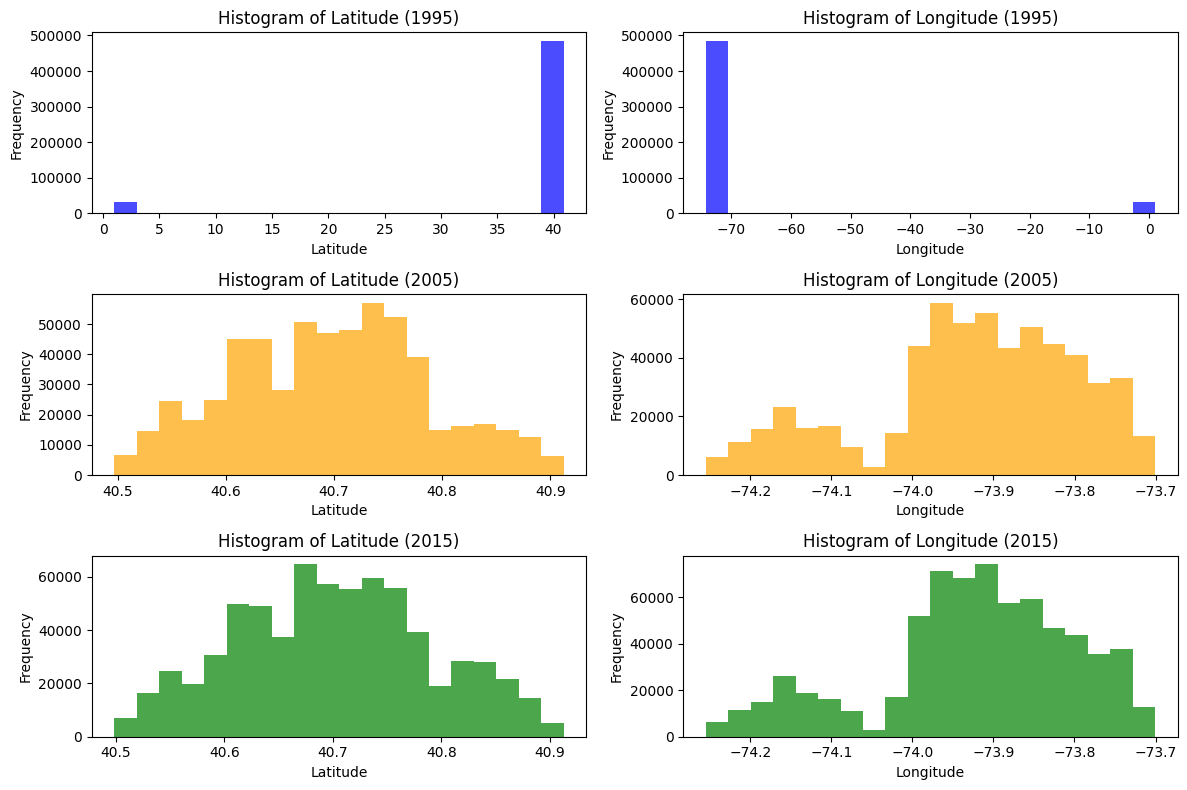

In [13]:
df95 = pd.read_csv(clean_data[1995])
df05 = pd.read_csv(clean_data[2005])
df15 = pd.read_csv(clean_data[2015])

# Latitude and Longitude ranges before cleaning
print("1995 Latitude range:", df95['latitude'].min(), "-", df95['latitude'].max())
print("1995 Longitude range:", df95['longitude'].min(), "-", df95['longitude'].max())

print("2005 Latitude range:", df05['latitude'].min(), "-", df05['latitude'].max())
print("2005 Longitude range:", df05['longitude'].min(), "-", df05['longitude'].max())

print("2015 Latitude range:", df15['latitude'].min(), "-", df15['latitude'].max())
print("2015 Longitude range:", df15['longitude'].min(), "-", df15['longitude'].max())

# Plot histograms before cleaning
datasets = [
    (df95, "1995", "blue"),
    (df05, "2005", "orange"),
    (df15, "2015", "green")
]

fig, axes = plt.subplots(3, 2, figsize=(12, 8))

for row, (df, year, color) in enumerate(datasets):
    for col, var in enumerate(["latitude", "longitude"]):
        ax = axes[row, col]
        ax.hist(df[var].dropna(), bins=20, alpha=0.7, color=color)
        ax.set_title(f"Histogram of {var.capitalize()} ({year})")
        ax.set_xlabel(var.capitalize())
        ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

Fix the problem with records in the 1995 dataset where `latitude` and `longitude` = 1.0

Number of records with latitude = 1.0 in 1995 data: 32387
Number of records with longitude = 1.0 in 1995 data: 32387
Removed 32387 records from 1995 data
1995 Latitude range: 40.496905 - 40.911965
1995 Longitude range: -74.254757 - -73.700278
Saved cleaned data to 1995_trees.csv


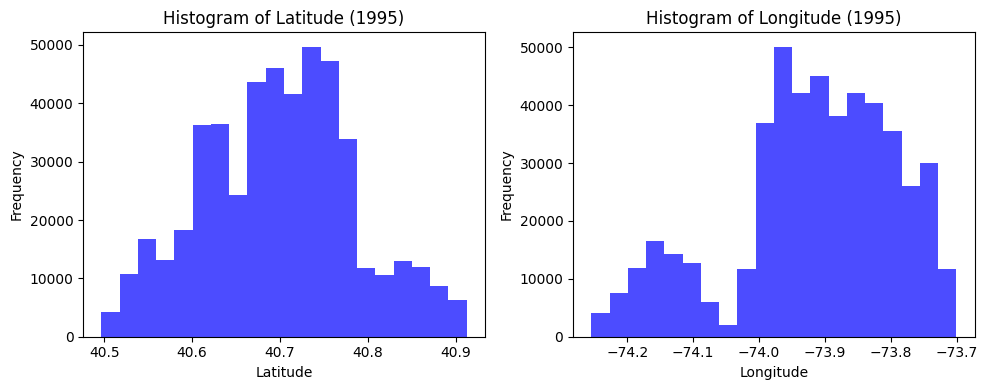

In [14]:
# Count and remove records with latitude or longitude = 1.0
before_count = len(df95)
lat_1 = df95[(df95['latitude'] == 1)].shape[0]
print("Number of records with latitude = 1.0 in 1995 data:", lat_1)
lon_1 = df95[(df95['longitude'] == 1)].shape[0]
print("Number of records with longitude = 1.0 in 1995 data:", lon_1)
df95 = df95[(df95['latitude'] != 1) & (df95['longitude'] != 1)]

after_count = len(df95)
print(f"Removed {before_count - after_count} records from 1995 data")
print("1995 Latitude range:", df95['latitude'].min(), "-", df95['latitude'].max())
print("1995 Longitude range:", df95['longitude'].min(), "-", df95['longitude'].max())

# Save cleaned data
save_df(df95, clean_data[1995])

# Plot histograms after cleaning
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for ax, var in zip(axes, ['latitude', 'longitude']):
    ax.hist(df95[var].dropna(), bins=20, alpha=0.7, color="blue")
    ax.set_title(f"Histogram of {var.capitalize()} (1995)")
    ax.set_xlabel(var.capitalize())
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

### 4. Missing values

Create heatmaps with missing values in 1995, 2005 and 2015 datasets

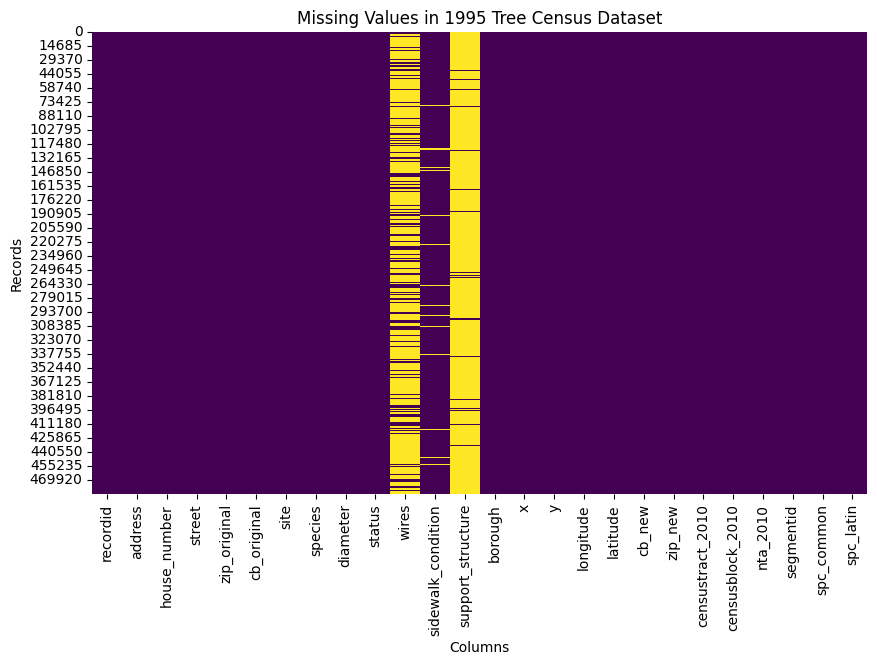

In [15]:
df = pd.read_csv(clean_data[1995])

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

plt.title("Missing Values in 1995 Tree Census Dataset")
plt.xlabel("Columns")
plt.ylabel("Records")

plt.show()

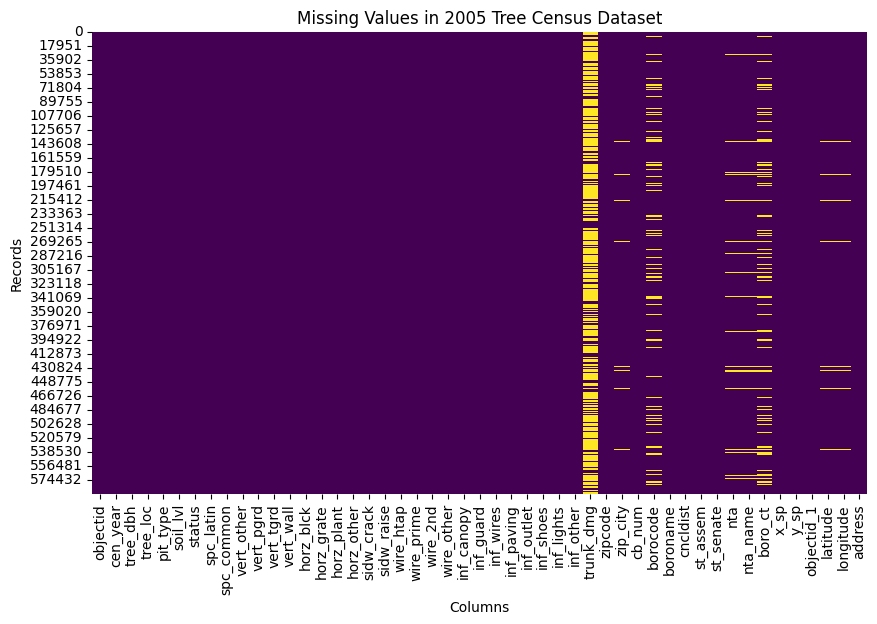

In [16]:
df = pd.read_csv(clean_data[2005])

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

plt.title("Missing Values in 2005 Tree Census Dataset")
plt.xlabel("Columns")
plt.ylabel("Records")

plt.show()

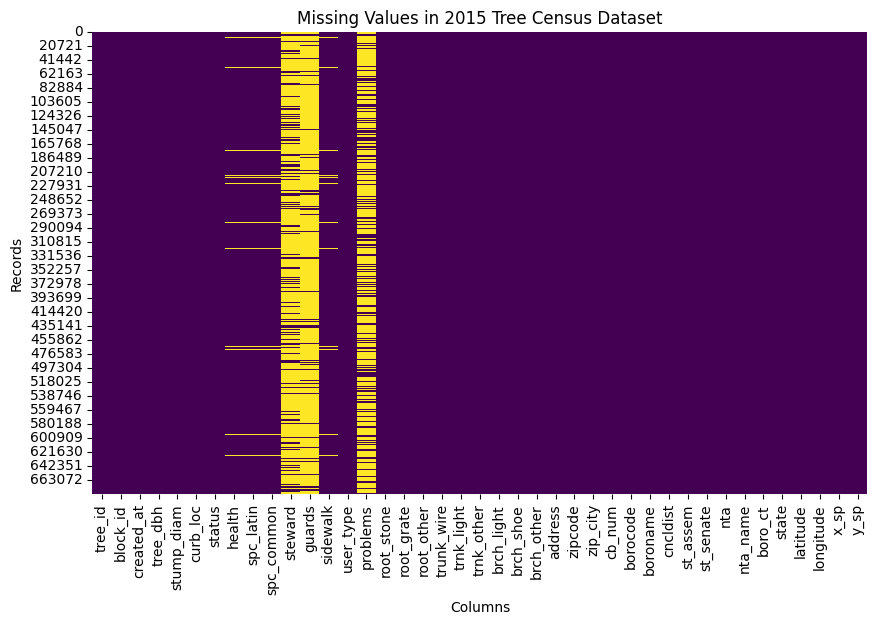

In [17]:
df = pd.read_csv(clean_data[2015])

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

plt.title("Missing Values in 2015 Tree Census Dataset")
plt.xlabel("Columns")
plt.ylabel("Records")

plt.show()

Drop columns or records with missing values

In [18]:
# Read datasets
df95 = pd.read_csv(clean_data[1995])
df05 = pd.read_csv(clean_data[2005])
df15 = pd.read_csv(clean_data[2015])

# Drop unnecessary columns and handle missing values
df95 = df95.drop(columns=['wires', 'support_structure'])
print('Dropped columns:', ['wires', 'support_structure'])
df95 = df95.dropna(subset=['sidewalk_condition'])
print('Dropped records with missing values', ['sidewalk_condition'])

df05 = df05.drop(columns=['trunk_dmg'])
print('Dropped columns:', ['trunk_dmg'])
df05 = df05.dropna(subset=['zip_city', 'borocode', 'nta', 'nta_name', 'boro_ct', 'latitude', 'longitude'])
print('Dropped records with missing values', ['zip_city', 'borocode', 'nta', 'nta_name', 'boro_ct', 'latitude', 'longitude'])

df15 = df15.drop(columns=['steward', 'guards'])
print('Dropped columns:', ['steward', 'guards'])
print('Replaced empty strings in "problems" column with "NoProblems"')
df15 = df15.dropna(subset=['health', 'spc_latin', 'spc_common', 'sidewalk'])
print('Dropped records with missing values', ['health', 'spc_latin', 'spc_common', 'sidewalk'])
df15['problems'] = (
    df15['problems']
        .astype("string")
        .fillna("")
        .str.strip()
        .replace({"": "NoProblems"})
)

# Save cleaned datasets
save_df(df95, clean_data[1995])
save_df(df05, clean_data[2005])
save_df(df15, clean_data[2015])

Dropped columns: ['wires', 'support_structure']
Dropped records with missing values ['sidewalk_condition']
Dropped columns: ['trunk_dmg']
Dropped records with missing values ['zip_city', 'borocode', 'nta', 'nta_name', 'boro_ct', 'latitude', 'longitude']
Dropped columns: ['steward', 'guards']
Replaced empty strings in "problems" column with "NoProblems"
Dropped records with missing values ['health', 'spc_latin', 'spc_common', 'sidewalk']
Saved cleaned data to 1995_trees.csv
Saved cleaned data to 2005_trees.csv
Saved cleaned data to 2015_trees.csv


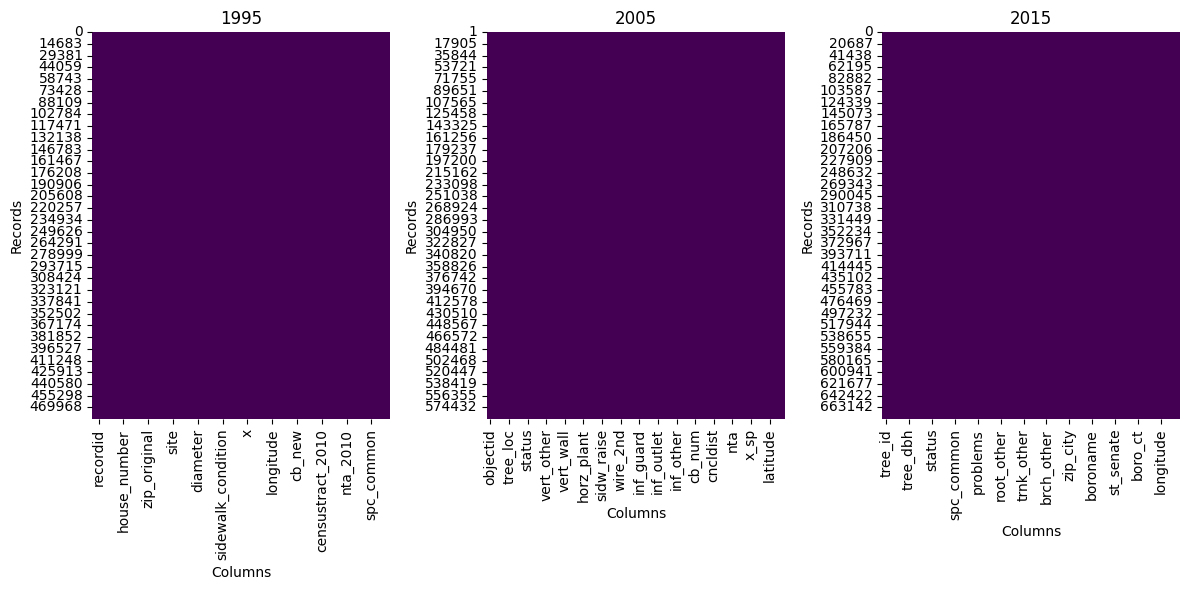

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

datasets = [df95, df05, df15]
titles = ["1995", "2005", "2015"]

for ax, df, title in zip(axes, datasets, titles):
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis", ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Columns")
    ax.set_ylabel("Records")

plt.tight_layout()
plt.show()

### 5. Drop unnecessary columns

In [20]:
# Read datasets
df95 = pd.read_csv(clean_data[1995])
df05 = pd.read_csv(clean_data[2005])
df15 = pd.read_csv(clean_data[2015])

# Drop unnecessary columns
df95_todrop = ['house_number', 'street', 'zip_original', 'cb_original', 'site', 'species', 'sidewalk_condition', 'cb_new', 'censustract_2010', 'censusblock_2010', 'segmentid']
df95 = df95.drop(columns=df95_todrop)
print('Dropped columns:', df95_todrop)

df05_todrop = ['cen_year', 'tree_loc', 'pit_type', 'soil_lvl', 'vert_other', 'vert_pgrd', 'vert_tgrd', 'vert_wall', 'horz_blck', 'horz_grate', 'horz_plant', 'horz_other', 'sidw_crack', 'sidw_raise', 'wire_htap', 'wire_prime', 'wire_2nd', 'wire_other', 'inf_canopy', 'inf_guard', 'inf_wires', 'inf_paving', 'inf_outlet', 'inf_shoes', 'inf_lights', 'inf_other', 'cb_num', 'borocode', 'cncldist', 'st_assem', 'st_senate', 'boro_ct', 'objectid_1']
df05 = df05.drop(columns=df05_todrop)
print('Dropped columns:', df05_todrop)

df15_todrop = ['block_id', 'created_at', 'stump_diam', 'curb_loc', 'status', 'sidewalk', 'root_stone', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other', 'cb_num', 'borocode', 'cncldist', 'st_assem', 'st_senate', 'boro_ct', 'state']
df15 = df15.drop(columns=df15_todrop)
print('Dropped columns:', df15_todrop)

# Save cleaned datasets
save_df(df95, clean_data[1995])
save_df(df05, clean_data[2005])
save_df(df15, clean_data[2015])

Dropped columns: ['house_number', 'street', 'zip_original', 'cb_original', 'site', 'species', 'sidewalk_condition', 'cb_new', 'censustract_2010', 'censusblock_2010', 'segmentid']
Dropped columns: ['cen_year', 'tree_loc', 'pit_type', 'soil_lvl', 'vert_other', 'vert_pgrd', 'vert_tgrd', 'vert_wall', 'horz_blck', 'horz_grate', 'horz_plant', 'horz_other', 'sidw_crack', 'sidw_raise', 'wire_htap', 'wire_prime', 'wire_2nd', 'wire_other', 'inf_canopy', 'inf_guard', 'inf_wires', 'inf_paving', 'inf_outlet', 'inf_shoes', 'inf_lights', 'inf_other', 'cb_num', 'borocode', 'cncldist', 'st_assem', 'st_senate', 'boro_ct', 'objectid_1']
Dropped columns: ['block_id', 'created_at', 'stump_diam', 'curb_loc', 'status', 'sidewalk', 'root_stone', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other', 'cb_num', 'borocode', 'cncldist', 'st_assem', 'st_senate', 'boro_ct', 'state']
Saved cleaned data to 1995_trees.csv
Saved cleaned data to 2005_trees.csv
Save

### 6. Unify columns containing data on ZIP Codes and NTAs

In [21]:
# Read datasets
df95 = pd.read_csv(clean_data[1995])
df05 = pd.read_csv(clean_data[2005])
df15 = pd.read_csv(clean_data[2015])

# Rename columns (1995 only)
df95 = df95.rename(columns={
    'zip_new': 'zipcode',
    'nta_2010': 'nta'
})

# Unify data types
for df in [df95, df05, df15]:
    df['zipcode'] = (
        df['zipcode']
        .astype(str)
        .str.zfill(5)
        .replace('nan', pd.NA)
    )
    df['nta'] = (
        df['nta']
        .astype(str)
        .str.upper()
        .str.strip()
        .replace('NAN', pd.NA)
    )

# Create safe lookup tables
zip_lookup = (
    df15[['zipcode', 'zip_city']]
    .dropna()
    .drop_duplicates(subset=['zipcode'])
)

nta_lookup = (
    df15[['nta', 'nta_name']]
    .dropna()
    .drop_duplicates(subset=['nta'])
)

# Remove existing columns to keep pipeline idempotent
for df in [df95, df05]:
    df.drop(columns=['zip_city', 'nta_name'], errors='ignore', inplace=True)

# Enrich 1995 and 2005
df95 = df95.merge(zip_lookup, on='zipcode', how='left')
df95 = df95.merge(nta_lookup, on='nta', how='left')

df05 = df05.merge(zip_lookup, on='zipcode', how='left')
df05 = df05.merge(nta_lookup, on='nta', how='left')

# Missing values summary
summary = pd.DataFrame({
    'year': [1995, 2005, 2015],
    'missing_zip_city': [
        df95['zip_city'].isna().sum(),
        df05['zip_city'].isna().sum(),
        df15['zip_city'].isna().sum()
    ],
    'missing_nta_name': [
        df95['nta_name'].isna().sum(),
        df05['nta_name'].isna().sum(),
        df15['nta_name'].isna().sum()
    ]
})

print("Missing values after merging:")
print(summary)

Missing values after merging:
   year  missing_zip_city  missing_nta_name
0  1995              7492              7729
1  2005               109              1051
2  2015                 0                 0


In [22]:
# Remove records with missing value in 'zip_city' or 'nta_name' columns
df95_before_count = len(df95)
df05_before_count = len(df05)
df95 = df95.dropna(subset=['zip_city', 'nta_name'])
df05 = df05.dropna(subset=['zip_city', 'nta_name'])

df95_after_count = len(df95)
df05_after_count = len(df05)
print(f"Removed {df95_before_count - df95_after_count} records from 1995 data")
print(f"Removed {df05_before_count - df05_after_count} records from 2005 data")

# Save cleaned datasets
save_df(df95, clean_data[1995])
save_df(df05, clean_data[2005])
save_df(df15, clean_data[2015])

Removed 7869 records from 1995 data
Removed 1160 records from 2005 data
Saved cleaned data to 1995_trees.csv
Saved cleaned data to 2005_trees.csv
Saved cleaned data to 2015_trees.csv


### 7. Unify column names across all datasets

Common columns across all datasets

In [23]:
# Read datasets
df95 = pd.read_csv(clean_data[1995])
df05 = pd.read_csv(clean_data[2005])
df15 = pd.read_csv(clean_data[2015])

# Check common columns
cols95 = set(df95.columns)
cols05 = set(df05.columns)
cols15 = set(df15.columns)

common_cols = cols95 & cols05 & cols15
print("Common columns across all datasets:")
print(sorted(common_cols))

Common columns across all datasets:
['address', 'latitude', 'longitude', 'nta', 'nta_name', 'spc_common', 'spc_latin', 'zip_city', 'zipcode']


Rename columns in all datasets

In [24]:
# Rename columns
df95 = df95.rename(columns={
    'recordid': 'tree_id',
    'diameter': 'tree_dbh',
    'status': 'health',
    'x': 'x_sp',
    'y': 'y_sp'
})

df05 = df05.rename(columns={
    'objectid': 'tree_id',
    'status': 'health',
    'boroname': 'borough'
})

df15 = df15.rename(columns={'boroname': 'borough'})

# Save cleaned datasets
save_df(df95, clean_data[1995])
save_df(df05, clean_data[2005])
save_df(df15, clean_data[2015])

Saved cleaned data to 1995_trees.csv
Saved cleaned data to 2005_trees.csv
Saved cleaned data to 2015_trees.csv


### 8. Reorder columns across all datasets

Convert string columns to 'string' dtype

In [32]:
# Convert string columns to 'string' dtype
df95_stringcols = ['spc_common', 'spc_latin', 'health', 'address', 'zip_city', 'nta_name', 'borough', 'nta']
df95[df95_stringcols] = df95[df95_stringcols].astype('string')
print("Converted 1995 string columns to 'string' dtype")

df05_stringcols = ['spc_common', 'spc_latin', 'health', 'address', 'zip_city', 'nta_name', 'borough', 'nta']
df05[df05_stringcols] = df05[df05_stringcols].astype('string')
print("Converted 2005 string columns to 'string' dtype")

df15_stringcols = ['spc_common', 'spc_latin', 'health', 'address', 'zip_city', 'nta_name', 'borough', 'nta', 'user_type', 'problems']
df15[df15_stringcols] = df15[df15_stringcols].astype('string')
print("Converted 2015 string columns to 'string' dtype")

# Check data types
df15.dtypes

Converted 1995 string columns to 'string' dtype
Converted 2005 string columns to 'string' dtype
Converted 2015 string columns to 'string' dtype


tree_id                 int64
spc_common     string[python]
spc_latin      string[python]
tree_dbh                int64
address        string[python]
zip_city       string[python]
nta_name       string[python]
borough        string[python]
zipcode                 int64
nta            string[python]
latitude              float64
longitude             float64
x_sp                  float64
y_sp                  float64
health         string[python]
user_type      string[python]
problems       string[python]
census_year             int64
dtype: object

Case normalization of species name fields (`spc_common`, `spc_latin`) in the 2015 dataset

In [ ]:
# Standardize species names to uppercase
df15['spc_common'] = df15['spc_common'].apply(lambda c: c.upper())
df15['spc_latin'] = df15['spc_latin'].apply(lambda c: c.upper())

Saved cleaned data to 1995_trees.csv
Saved cleaned data to 2005_trees.csv
Saved cleaned data to 2015_trees.csv


Reorder columns

In [ ]:
# Define standard column order
standard_order = [
    'tree_id',
    'spc_common',
    'spc_latin',
    'tree_dbh',
    'status',
    'address',
    'zip_city',
    'nta_name',
    'borough',
    'zipcode',
    'nta',
    'latitude',
    'longitude',
    'x_sp',
    'y_sp',
    'census_year'
]

# Function to reorder columns
def reorder(df, priority_cols):
    priority = [c for c in priority_cols if c in df.columns]
    rest = [c for c in df.columns if c not in priority]
    return df[priority + rest].copy()

# Reorder columns
df95 = reorder(df95, standard_order)
df05 = reorder(df05, standard_order)
df15 = reorder(df15, standard_order)

# Display cleaned dataset sizes
print("1995 cleaned dataset size:", df95.shape)
print("2005 cleaned dataset size:", df05.shape)
print("2015 cleaned dataset size:", df15.shape)

# Combine all cleaned datasets for overall size
df_all = pd.concat([df95, df05, df15], ignore_index=True, sort=False)
print("Total cleaned dataset size:", df_all.shape)

# Save cleaned datasets
save_df(df95, clean_data[1995])
save_df(df05, clean_data[2005])
save_df(df15, clean_data[2015])

Explore first 10 records in cleaned datasets

In [39]:
df95.head(10)

,tree_id,spc_common,spc_latin,tree_dbh,address,zip_city,nta_name,borough,zipcode,nta,latitude,longitude,x_sp,y_sp,census_year,health
0,433600,OAK PIN,QUERCUS PALUSTRIS,6,73-031 57 AV,Maspeth,Maspeth,Queens,11378,QN30,40.728546,-73.888337,1.015199e+06,204725.3752,1995,Good
1,48050,HONEYLOCUST,GLEDITSIA TRIACANTHOS,10,2434 HOFFMAN ST,Bronx,Belmont,Bronx,10458,BX06,40.856668,-73.887809,1.015285e+06,251404.6333,1995,Excellent
2,506340,OAK NORTHERN RED,QUERCUS RUBRA,21,33 MULBERRY CIR,Staten Island,New Springville-Bloomfield-Travis,Staten Island,10314,SI05,40.598675,-74.165972,9.381592e+05,157433.6199,1995,Good
3,348044,MAPLE NORWAY,ACER PLATANOIDES,15,79-037 213 ST,Oakland Gardens,Oakland Gardens,Queens,11364,QN42,40.734906,-73.758549,1.051165e+06,207115.0182,1995,Poor
4,228644,OAK PIN,QUERCUS PALUSTRIS,25,30-023 84 ST,East Elmhurst,Jackson Heights,Queens,11370,QN28,40.760952,-73.884454,1.016259e+06,216533.0617,1995,Good
5,154016,LONDON PLANETREE,PLATANUS ACERIFOLIA,15,562 1 ST,Brooklyn,Park Slope-Gowanus,Brooklyn,11215,BK37,40.669840,-73.973673,9.915532e+05,183318.2085,1995,Poor
6,499366,GINKGO,GINKGO BILOBA,6,93 LITTLE CLOVE RD,Staten Island,Westerleigh,Staten Island,10301,SI07,40.610908,-74.101919,9.559520e+05,161863.0001,1995,Good
7,51547,HONEYLOCUST,GLEDITSIA TRIACANTHOS,5,100 ALCOTT PL,Bronx,Co-op City,Bronx,10475,BX13,40.871484,-73.830557,1.031112e+06,256828.3200,1995,Excellent
8,377394,ASH GREEN,FRAXINUS PENNSYLVANICA,8,86-008 RANGE ST,Queens Village,Bellerose,Queens,11427,QN43,40.732899,-73.733287,1.058168e+06,206404.0153,1995,Good
9,110908,LONDON PLANETREE,PLATANUS ACERIFOLIA,25,230 KINGSTON AV,Brooklyn,Crown Heights North,Brooklyn,11213,BK61,40.671892,-73.941963,1.000349e+06,184070.0751,1995,Good


In [40]:
df05.head(10)

,tree_id,spc_common,spc_latin,tree_dbh,address,zip_city,nta_name,borough,zipcode,nta,latitude,longitude,x_sp,y_sp,census_year,health
0,1017551,PEAR CALLERY,PYRUS CALLERYANA,7,23-59 36 STREET,Astoria,Steinway,Queens,11105,QN72,40.771244,-73.911988,1008628,220274,2005,Good
1,730461,ZELKOVA JAPANESE,ZELKOVA SERRATA,11,491 ATLANTIC AVENUE,Brooklyn,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,Brooklyn,11217,BK38,40.685648,-73.981510,989378,189077,2005,Good
2,718618,LONDON PLANETREE,PLATANUS ACERIFOLIA,23,8306 10 AVENUE,Brooklyn,Dyker Heights,Brooklyn,11228,BK30,40.619672,-74.018853,979016,165040,2005,Good
3,926349,MAPLE SYCAMORE,ACER PSEUDOPLATANUS,10,106-26 50 AVENUE,Corona,Corona,Queens,11368,QN25,40.744178,-73.857010,1023872,210433,2005,Excellent
4,741134,MAPLE NORWAY-CR KNG,ACER PLATANOIDES CRIMSON KING,5,619 PRESIDENT STREET,Brooklyn,Park Slope-Gowanus,Brooklyn,11215,BK37,40.676316,-73.982255,989172,185677,2005,Poor
5,961017,LONDON PLANETREE,PLATANUS ACERIFOLIA,31,104-39 41 AVENUE,Corona,North Corona,Queens,11368,QN26,40.749293,-73.860868,1022800,212295,2005,Good
6,618481,PLUM PURPLELEAF,PRUNUS CERASIFERA,2,57 ST NICHOLAS PLACE,New York,Hamilton Heights,Manhattan,10031,MN04,40.828820,-73.941282,1000500,241244,2005,Good
7,995799,LINDEN LITTLE LEAF,TILIA CORDATA,16,81-07 254 STREET,Glen Oaks,Glen Oaks-Floral Park-New Hyde Park,Queens,11004,QN44,40.741544,-73.715724,1063025,209569,2005,Good
8,614666,HONEYLOCUST,GLEDITSIA TRIACANTHOS,5,66 OVERLOOK TERRACE,New York,Washington Heights North,Manhattan,10040,MN35,40.855218,-73.935865,1001992,250863,2005,Good
9,1056796,ASH GREEN,FRAXINUS PENNSYLVANICA,11,2055 GATES AVENUE,Ridgewood,Ridgewood,Queens,11385,QN20,40.707003,-73.904610,1010697,196871,2005,Good


In [41]:
df15.head(10)

,tree_id,spc_common,spc_latin,tree_dbh,address,zip_city,nta_name,borough,zipcode,nta,latitude,longitude,x_sp,y_sp,census_year,health,user_type,problems
0,606945,GREEN ASH,FRAXINUS PENNSYLVANICA,10,76-046 164 STREET,Fresh Meadows,Kew Gardens Hills,Queens,11366,QN37,40.724339,-73.805180,1.038250e+06,203232.9417,2015,Good,TreesCount Staff,Stones
1,160321,HONEYLOCUST,GLEDITSIA TRIACANTHOS VAR. INERMIS,9,72-020 32 AVENUE,East Elmhurst,Jackson Heights,Queens,11370,QN28,40.756626,-73.894167,1.013571e+06,214953.6472,2015,Good,Volunteer,BranchLights
2,541347,CALLERY PEAR,PYRUS CALLERYANA,7,153-026 119 AVENUE,Jamaica,Baisley Park,Queens,11434,QN76,40.679777,-73.788463,1.042923e+06,187008.2671,2015,Good,TreesCount Staff,BranchLights
3,613930,CALLERY PEAR,PYRUS CALLERYANA,10,89 89 STREET,Brooklyn,Bay Ridge,Brooklyn,11209,BK31,40.622743,-74.037543,9.738279e+05,166160.5847,2015,Good,TreesCount Staff,NoProblems
4,18353,'SCHUBERT' CHOKECHERRY,PRUNUS VIRGINIANA,4,559 BEACH 68 STREET,Arverne,Hammels-Arverne-Edgemere,Queens,11692,QN12,40.596514,-73.797622,1.040452e+06,156667.5017,2015,Good,TreesCount Staff,BranchLights
5,21173,HONEYLOCUST,GLEDITSIA TRIACANTHOS VAR. INERMIS,8,3554 BROADWAY,New York,Hamilton Heights,Manhattan,10031,MN04,40.826887,-73.949889,9.981185e+05,240538.5367,2015,Good,Volunteer,TrunkOtherBranchOther
6,544698,NORTHERN RED OAK,QUERCUS RUBRA,2,2030 PITKIN AVENUE,Brooklyn,East New York (Pennsylvania Ave),Brooklyn,11207,BK85,40.671347,-73.897614,1.012652e+06,183882.7143,2015,Fair,TreesCount Staff,NoProblems
7,546240,AMERICAN LINDEN,TILIA AMERICANA,2,5008 FT HAMILTON PARKWAY,Brooklyn,Borough Park,Brooklyn,11219,BK88,40.637774,-73.998692,9.846129e+05,171634.7857,2015,Good,Volunteer,NoProblems
8,646348,PIN OAK,QUERCUS PALUSTRIS,4,85-006 WOODHAVEN BOULEVARD,Woodhaven,Woodhaven,Queens,11421,QN53,40.696668,-73.853087,1.024988e+06,193125.4947,2015,Good,TreesCount Staff,NoProblems
9,413812,AMERICAN ELM,ULMUS AMERICANA,5,1340 EAST BAY AVENUE,Bronx,Hunts Point,Bronx,10474,BX27,40.808967,-73.882647,1.016736e+06,234027.3437,2015,Good,TreesCount Staff,NoProblems
